In [1]:
from astropy.cosmology import Planck18
from astropy.coordinates import SkyCoord
import astropy.units as u

from astropy.table import Table, Column
import pandas as pd
import os
import glob
import random

In [2]:
from astropy.table import Table as t

# URL base de los datos de DESI Early Data Release
base_url = 'https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/'

# Archivos para BGS Norte y Sur (datos y randoms)
dat_N_url = f'{base_url}BGS_ANY_N_clustering.dat.fits'

dat_S_url = f'{base_url}BGS_ANY_S_clustering.dat.fits'

data_N = t.read(dat_N_url)

data_S = t.read(dat_S_url)

print("Datos cargados correctamente.")

Datos cargados correctamente.


In [3]:
names_N = [name for name in data_N.colnames if len(data_N[name].shape) <= 1]
names_S = [name for name in data_S.colnames if len(data_S[name].shape) <= 1]

# Convert to pandas DataFrame with only valid columns
df_N = data_N[names_N].to_pandas()
df_S = data_S[names_S].to_pandas()

# Concatenate both DataFrames
df_total = pd.concat([df_N, df_S], ignore_index=True)
df_total.rename(columns={'Z': 'REDSHIFT'}, inplace=True)

In [4]:
df = {}
for rosette in sorted(df_total['ROSETTE_NUMBER'].unique()):
    df[rosette] = df_total[df_total['ROSETTE_NUMBER'] == rosette].copy()

In [5]:
# Paths base
xyz_data_dir = "../XYZ_outputs/XYZ_data"
xyz_random_dir = "data_100_random"
plots_dir = "100_rand_plots"
tables_dir = "100_rand_tablas"

# Crear carpetas si no existen
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(tables_dir, exist_ok=True)

In [7]:
def load_xyz_data_by_rosetta(rosetta_index):
    # Datos reales
    real_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
    df_real = Table.read(real_path).to_pandas()

    # 100 randoms
    randoms = []
    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        randoms.append(df_rand)

    return df_real, randoms

In [8]:
# Diagnóstico
test_rosetta = 0
test_file = f"{xyz_random_dir}/BGS_{test_rosetta}clustering_random0.ecsv"
print("🔍 Buscando:", test_file)
assert os.path.exists(test_file), "❌ Archivo no encontrado. Revisa la ruta o nombre."

# Verifica columnas
df_rand_test = Table.read(test_file).to_pandas()
print("✅ Archivo cargado correctamente.")
print(df_rand_test.columns)

🔍 Buscando: data_100_random/BGS_0clustering_random0.ecsv
✅ Archivo cargado correctamente.
Index(['TARGETID', 'X', 'Y', 'Z'], dtype='object')


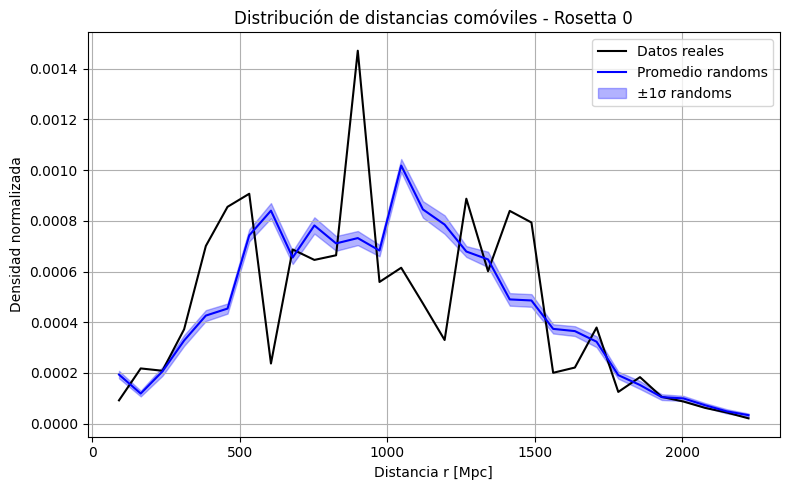

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os

def plot_histogram_r_local(rosetta_index, bins=30):
    # Cargar datos reales
    data_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
    df_real = Table.read(data_path).to_pandas()

    # Cargar los 100 archivos random
    random_r_list = []
    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        r_rand = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)
        random_r_list.append(r_rand)

    # Distancia para los datos reales
    r_real = np.sqrt(df_real['X']**2 + df_real['Y']**2 + df_real['Z']**2)

    # Histograma para los datos reales
    hist_real, bin_edges = np.histogram(r_real, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Histogramas para los randoms
    hist_randoms = np.array([
        np.histogram(r, bins=bin_edges, density=True)[0] for r in random_r_list
    ])
    mean_random = np.mean(hist_randoms, axis=0)
    std_random = np.std(hist_randoms, axis=0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(bin_centers, hist_real, label="Datos reales", color='black')
    plt.plot(bin_centers, mean_random, label="Promedio randoms", color='blue')
    plt.fill_between(bin_centers, mean_random - std_random, mean_random + std_random,
                     color='blue', alpha=0.3, label="±1σ randoms")
    plt.title(f"Distribución de distancias comóviles - Rosetta {rosetta_index}")
    plt.xlabel("Distancia r [Mpc]")
    plt.ylabel("Densidad normalizada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_histogram_r_local(rosetta_index=0)

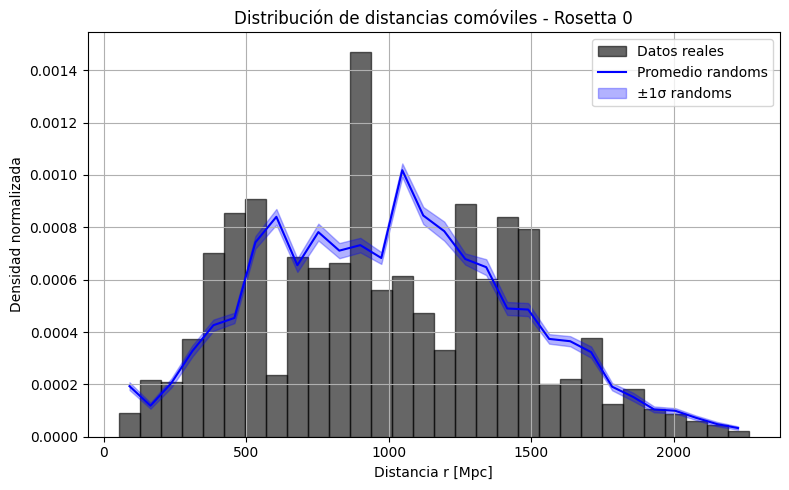

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os

def plot_histogram_r_local(rosetta_index, bins=30):
    # Cargar datos reales
    data_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
    df_real = Table.read(data_path).to_pandas()

    # Cargar los 100 archivos random
    random_r_list = []
    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        r_rand = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)
        random_r_list.append(r_rand)

    # Distancia para los datos reales
    r_real = np.sqrt(df_real['X']**2 + df_real['Y']**2 + df_real['Z']**2)

    # Histograma para los datos reales
    hist_real, bin_edges = np.histogram(r_real, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Histogramas para los randoms
    hist_randoms = np.array([
        np.histogram(r, bins=bin_edges, density=True)[0] for r in random_r_list
    ])
    mean_random = np.mean(hist_randoms, axis=0)
    std_random = np.std(hist_randoms, axis=0)

    # Plot
    plt.figure(figsize=(8, 5))
    
    # Histograma real como barras
    plt.hist(r_real, bins=bin_edges, density=True, alpha=0.6, label="Datos reales", color='black', edgecolor='black')

    # Promedio de los randoms como línea
    plt.plot(bin_centers, mean_random, color='blue', label="Promedio randoms")

    # Sombreado ±1σ
    plt.fill_between(bin_centers, mean_random - std_random, mean_random + std_random,
                     color='blue', alpha=0.3, label="±1σ randoms")

    plt.title(f"Distribución de distancias comóviles - Rosetta {rosetta_index}")
    plt.xlabel("Distancia r [Mpc]")
    plt.ylabel("Densidad normalizada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔍 Ejecutar para una rosetta
plot_histogram_r_local(rosetta_index=0)

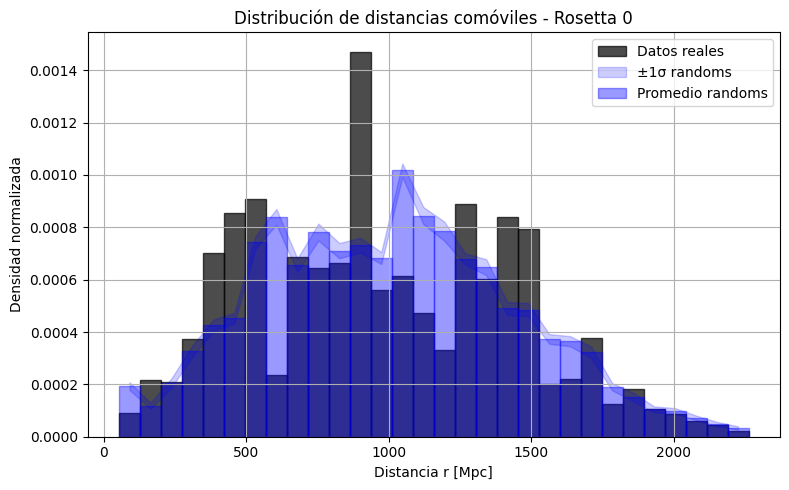

Histograma guardado para rosetta 0 en 100_rand_plots\hist_r_rosetta_0.png


In [18]:
def plot_histogram_r_local(rosetta_index, bins=30):
    # Cargar datos reales
    data_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
    df_real = Table.read(data_path).to_pandas()

    # Cargar los 100 archivos random
    random_r_list = []
    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        r_rand = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)
        random_r_list.append(r_rand)

    # Distancia para los datos reales
    r_real = np.sqrt(df_real['X']**2 + df_real['Y']**2 + df_real['Z']**2)

    # Histograma para los datos reales
    hist_real, bin_edges = np.histogram(r_real, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Histogramas para los randoms
    hist_randoms = np.array([
        np.histogram(r, bins=bin_edges, density=True)[0] for r in random_r_list
    ])
    mean_random = np.mean(hist_randoms, axis=0)
    std_random = np.std(hist_randoms, axis=0)

    # Plot
    plt.figure(figsize=(8, 5))
    
    # Histograma real como barras negras
    plt.hist(r_real, bins=bin_edges, density=True, alpha=0.7,
             label="Datos reales", color='black', edgecolor='black')

    # Promedio de los randoms como barras azules con transparencia
    plt.bar(bin_centers, mean_random, width=np.diff(bin_edges), 
            alpha=0.4, label="Promedio randoms", color='blue', edgecolor='blue')

    # Error ±1σ como banda (opcional, se puede quitar si quieres solo barras)
    plt.fill_between(bin_centers, mean_random - std_random, mean_random + std_random,
                     color='blue', alpha=0.2, label="±1σ randoms")

    plt.title(f"Distribución de distancias comóviles - Rosetta {rosetta_index}")
    plt.xlabel("Distancia r [Mpc]")
    plt.ylabel("Densidad normalizada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    output_dir = "100_rand_plots"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, f"hist_r_rosetta_{rosetta_index}.png")
    plt.savefig(output_path, dpi=300)
    plt.close()
    print(f"Histograma guardado para rosetta {rosetta_index} en {output_path}")

plot_histogram_r_local(rosetta_index=0)

In [21]:
import os

def plot_and_save_histogram_r(rosetta_index, bins=30):
    # Cargar datos reales
    data_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
    df_real = Table.read(data_path).to_pandas()

    # Cargar los 100 archivos random
    random_r_list = []
    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        r_rand = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)
        random_r_list.append(r_rand)

    # Distancia para los datos reales
    r_real = np.sqrt(df_real['X']**2 + df_real['Y']**2 + df_real['Z']**2)

    # Histograma para los datos reales
    hist_real, bin_edges = np.histogram(r_real, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Histogramas para los randoms
    hist_randoms = np.array([
        np.histogram(r, bins=bin_edges, density=True)[0] for r in random_r_list
    ])
    mean_random = np.mean(hist_randoms, axis=0)
    std_random = np.std(hist_randoms, axis=0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.hist(r_real, bins=bin_edges, density=True, alpha=0.7,
             label="Datos reales", color='black', edgecolor='black')
    plt.bar(bin_centers, mean_random, width=np.diff(bin_edges), alpha=0.4,
            label="Promedio randoms", color='blue', edgecolor='blue')
    plt.fill_between(bin_centers, mean_random - std_random, mean_random + std_random,
                     color='blue', alpha=0.2, label="±1σ randoms")

    plt.title(f"Distribución de distancias comóviles - Rosetta {rosetta_index}")
    plt.xlabel("Distancia r [Mpc]")
    plt.ylabel("Densidad normalizada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar
    output_dir = "100_rand_plots"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, f"hist_r_rosetta_{rosetta_index}.png")
    plt.savefig(output_path, dpi=300)
    plt.close()
    print(f"Histograma guardado para rosetta {rosetta_index} en {output_path}")

In [22]:
for rosetta_index in sorted(df.keys()):
    plot_and_save_histogram_r(rosetta_index)

Histograma guardado para rosetta 0 en 100_rand_plots\hist_r_rosetta_0.png
Histograma guardado para rosetta 1 en 100_rand_plots\hist_r_rosetta_1.png
Histograma guardado para rosetta 2 en 100_rand_plots\hist_r_rosetta_2.png
Histograma guardado para rosetta 3 en 100_rand_plots\hist_r_rosetta_3.png
Histograma guardado para rosetta 4 en 100_rand_plots\hist_r_rosetta_4.png
Histograma guardado para rosetta 5 en 100_rand_plots\hist_r_rosetta_5.png
Histograma guardado para rosetta 6 en 100_rand_plots\hist_r_rosetta_6.png
Histograma guardado para rosetta 7 en 100_rand_plots\hist_r_rosetta_7.png
Histograma guardado para rosetta 8 en 100_rand_plots\hist_r_rosetta_8.png
Histograma guardado para rosetta 9 en 100_rand_plots\hist_r_rosetta_9.png
Histograma guardado para rosetta 10 en 100_rand_plots\hist_r_rosetta_10.png
Histograma guardado para rosetta 11 en 100_rand_plots\hist_r_rosetta_11.png
Histograma guardado para rosetta 12 en 100_rand_plots\hist_r_rosetta_12.png
Histograma guardado para rosetta

In [25]:
def plot_all_histograms_grid(bins=30):
    fig, axs = plt.subplots(4, 5, figsize=(20, 16), sharex=True, sharey=True)
    axs = axs.flatten()

    for idx, rosetta_index in enumerate(sorted(df.keys())):
        # Cargar datos reales
        data_path = f"{xyz_data_dir}/BGS_{rosetta_index}_clustering_data.ecsv"
        df_real = Table.read(data_path).to_pandas()
        r_real = np.sqrt(df_real['X']**2 + df_real['Y']**2 + df_real['Z']**2)

        # Cargar randoms
        random_r_list = []
        for i in range(100):
            rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
            df_rand = Table.read(rand_path).to_pandas()
            r_rand = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)
            random_r_list.append(r_rand)

        # Histogramas
        hist_real, bin_edges = np.histogram(r_real, bins=bins, density=True)
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        hist_randoms = np.array([
            np.histogram(r, bins=bin_edges, density=True)[0] for r in random_r_list
        ])
        mean_random = np.mean(hist_randoms, axis=0)

        ax = axs[idx]
        ax.hist(r_real, bins=bin_edges, density=True, alpha=0.6,
                color='black', edgecolor='black')
        ax.plot(bin_centers, mean_random, color='blue', linewidth=1)
        ax.set_title(f"Rosetta {rosetta_index}", fontsize=10)
        ax.grid(True)

    plt.tight_layout()
    output_dir = "100_rand_plots"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "hist_r_todas_las_rosetas.png")
    plt.savefig(output_path, dpi=300)
    plt.close()
    print(f"Figura general guardada en {output_path}")

In [27]:
plot_all_histograms_grid()

📊 Figura general guardada en 100_rand_plots\hist_r_todas_las_rosetas.png


In [35]:
from scipy.stats import entropy
import seaborn as sns

def plot_entropy_pdf_rosetta(rosetta_index, bins=30):
    entropies = []

    for i in range(100):
        rand_path = f"{xyz_random_dir}/BGS_{rosetta_index}clustering_random{i}.ecsv"
        df_rand = Table.read(rand_path).to_pandas()
        r = np.sqrt(df_rand['X']**2 + df_rand['Y']**2 + df_rand['Z']**2)

        hist, _ = np.histogram(r, bins=bins, density=True)
        hist += 1e-12
        hist /= np.sum(hist)
        S = entropy(hist, base=np.e)
        norm_S = S / np.log(bins)

        entropies.append(norm_S)

    # Plot de la PDF (no histograma de barras)
    sns.kdeplot(entropies, label=f'Rosetta {rosetta_index}', linewidth=2)
    plt.xlabel('Normalized Shannon Entropy')
    plt.ylabel('PDF')
    plt.title(f'Distribución de entropía - Rosetta {rosetta_index}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

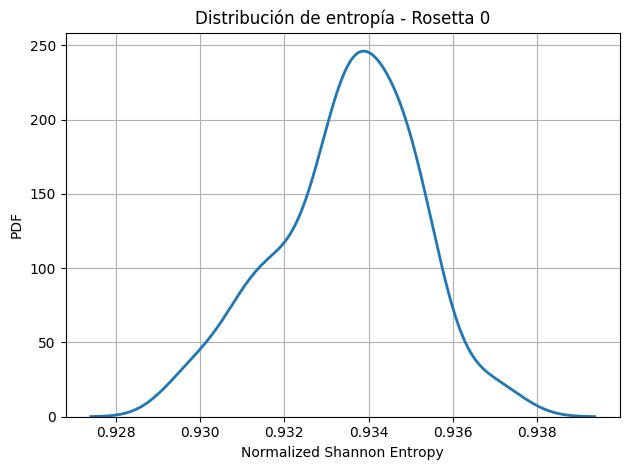

In [36]:
plot_entropy_pdf_rosetta(0)

In [ ]:
df_typed_all = [[None for _ in range(100)] for _ in range(20)]

for i in tqdm(range(20), desc="Rosettas"):
    # Read real data only once per rosette
    data_file = data_filenames[i]
    data = pd.read_csv(data_file, comment='#', sep=r'\s+', engine='python')
    data['RAN'] = False
    data['ROSETTE_ID'] = i

    for j in range(100):
        rand_file = f'{base_url_rand}QSO_{i}_clustering_random_{j}.ecsv'
        rand = pd.read_csv(rand_file, comment='#', sep=r'\s+', engine='python')
        rand['RAN'] = True
        rand['ROSETTE_ID'] = i

        # Concatenate real and random numbers
        df = pd.concat([data, rand], ignore_index=True)

        # PCA rotation
        df_rot = rotate_pca_3d(df)

        # Calculate r and classify
        df_r = compute_r(df_rot)
        df_typed = classify_r(df_r)
        df_typed_all[i][j] = df_typed

In [41]:
structure_types = ['void', 'sheet', 'filament', 'knot']
data_fractions = {i: {t: [] for t in structure_types} for i in range(20)} # RAN == False
rand_fractions = {i: {t: [] for t in structure_types} for i in range(20)} # RAN == True
for i in range(20):  # Rosettas
    for j in range(100):  # Randoms
        df = df_typed_all[i][j]

        for source, container in [(False, data_fractions), (True, rand_fractions)]:
            df_sub = df[df['RAN'] == source]
            total = len(df_sub)

            for t in structure_types:
                count = np.sum(df_sub['TYPE'] == t)
                frac = count / total if total > 0 else 0.0
                container[i][t].append(frac)

NameError: name 'df_typed_all' is not defined

In [ ]:
dfs_by_rosetta = []

for i in range(20):
    rosetta_rows = []
    rosetta_labels = []

    for label, container in [(f"Rosetta {i} data", data_fractions),
                             (f"Rosetta {i} rand", rand_fractions)]:
        row = []
        for t in structure_types:
            fracs = container[i][t]
            if len(fracs) == 0:
                mean_frac = 0.0
                std_frac = 0.0
            else:
                mean_frac = np.mean(fracs)
                std_frac = np.std(fracs, ddof=1)

            row.append(f"{mean_frac*100:.2f}% ± {std_frac*100:.2f}%")

        rosetta_rows.append(row)
        rosetta_labels.append(label)

    df_rosetta = pd.DataFrame(rosetta_rows,
                              columns=['Voids', 'Sheets', 'Filaments', 'Knots'],
                              index=rosetta_labels)
    dfs_by_rosetta.append(df_rosetta)


In [ ]:
for i, rosetta_df in enumerate(dfs_by_rosetta):
    print(f"\nRosetta {i}")
    display(rosetta_df)